In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import json

# Load data in

In [2]:
with open('storage_overhead.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)

df["originalSizeKB"] = df["originalSize"] / 1024

# Plot seperately

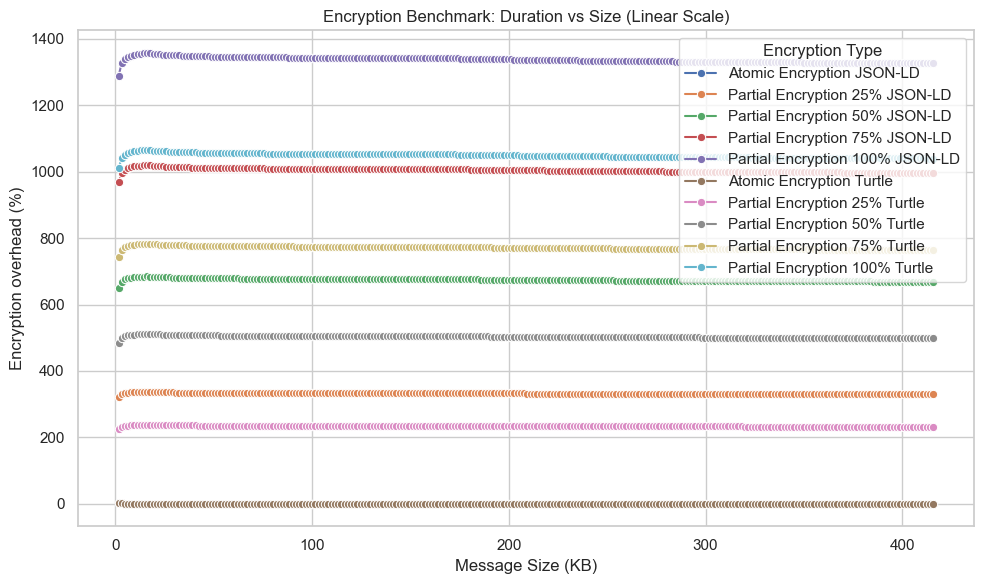

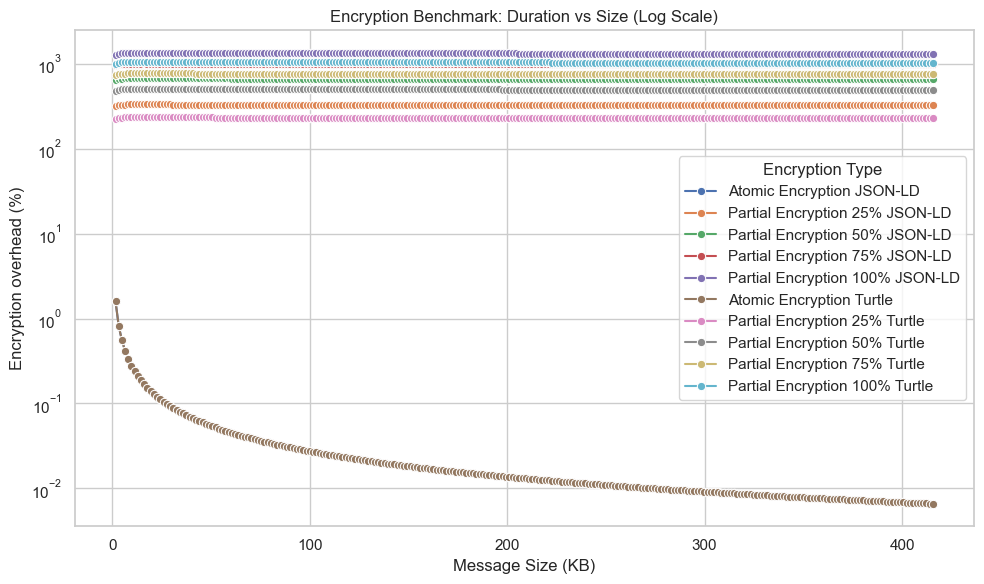

In [3]:
# Set seaborn style
sns.set(style="whitegrid")

# -------- Linear Scale Plot --------
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="originalSizeKB",
    y="overheadPercentage",
    hue="encryptionType",
    marker="o"
)
plt.title("Encryption Benchmark: Duration vs Size (Linear Scale)")
plt.xlabel("Message Size (KB)")
plt.ylabel("Encryption overhead (%)")
plt.legend(title="Encryption Type")
plt.tight_layout()
plt.savefig("encryption_benchmark_linear_plot.png")
plt.show()

# -------- Logarithmic Scale Plot --------
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="originalSizeKB",
    y="overheadPercentage",
    hue="encryptionType",
    marker="o"
)
plt.yscale("log")
plt.title("Encryption Benchmark: Duration vs Size (Log Scale)")
plt.xlabel("Message Size (KB)")
plt.ylabel("Encryption overhead (%)")
plt.legend(title="Encryption Type")
plt.tight_layout()
plt.savefig("encryption_benchmark_log_plot.png")
plt.show()

# Plot together

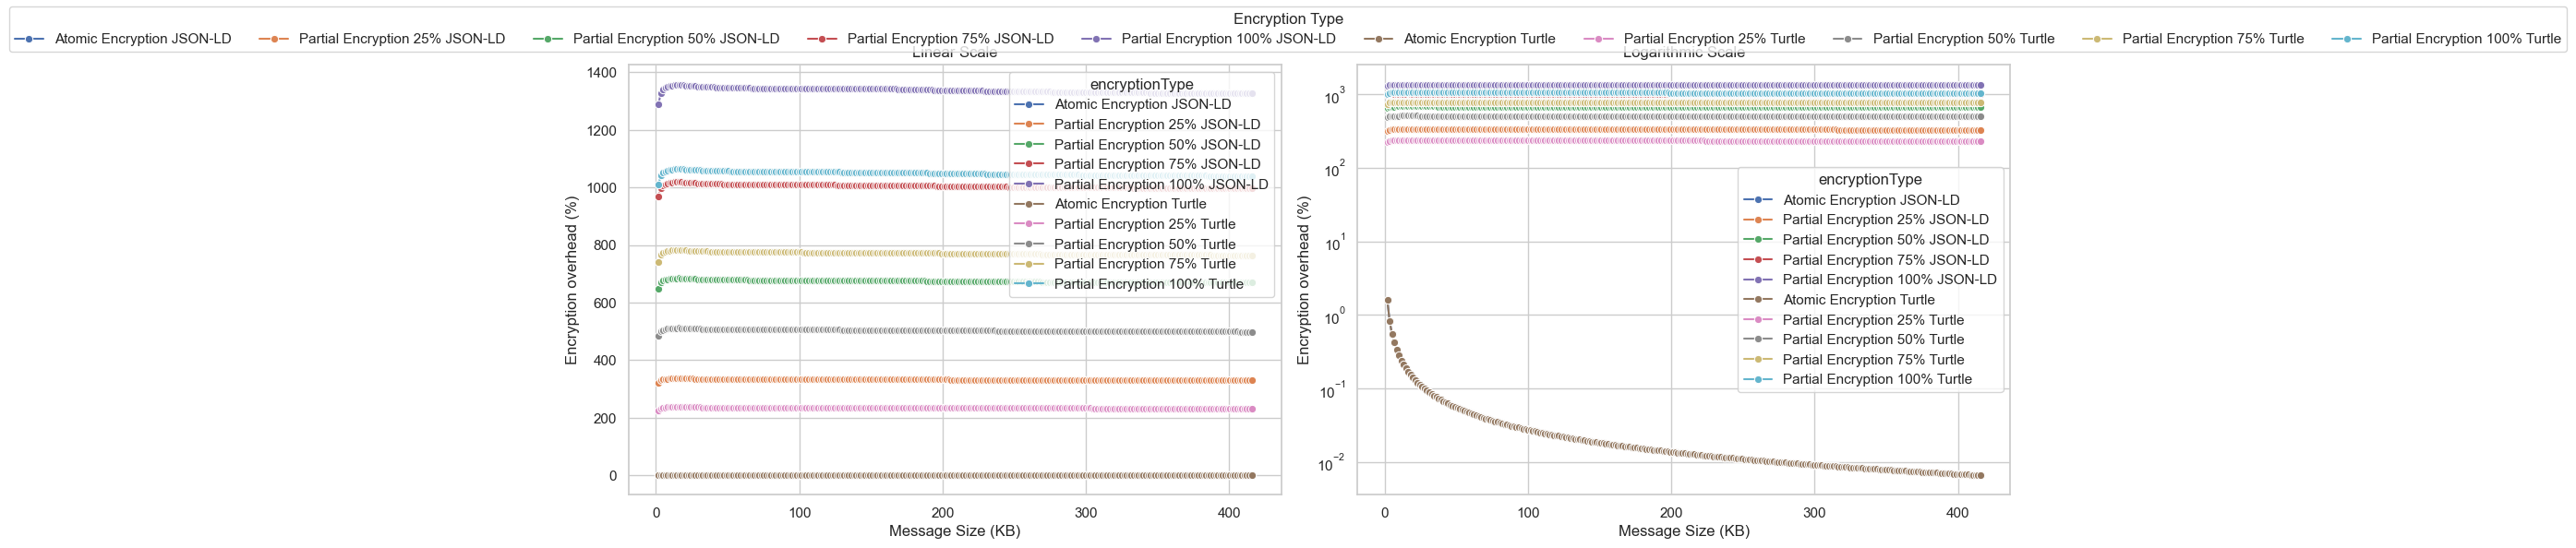

In [4]:
# Set seaborn style
sns.set(style="whitegrid")

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# ---- Linear scale plot ----
sns.lineplot(
    data=df,
    x="originalSizeKB",
    y="overheadPercentage",
    hue="encryptionType",
    marker="o",
    ax=axes[0]
)
axes[0].set_title("Linear Scale")
axes[0].set_xlabel("Message Size (KB)")
axes[0].set_ylabel("Encryption overhead (%)")

# ---- Log scale plot ----
sns.lineplot(
    data=df,
    x="originalSizeKB",
    y="overheadPercentage",
    hue="encryptionType",
    marker="o",
    ax=axes[1]
)
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic Scale")
axes[1].set_xlabel("Message Size (KB)")
axes[1].set_ylabel("Encryption overhead (%)")

# Adjust layout and add legend only once
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Encryption Type", loc="upper center", ncol=len(labels))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("encryption_benchmark_dual_plot.png")
plt.show()


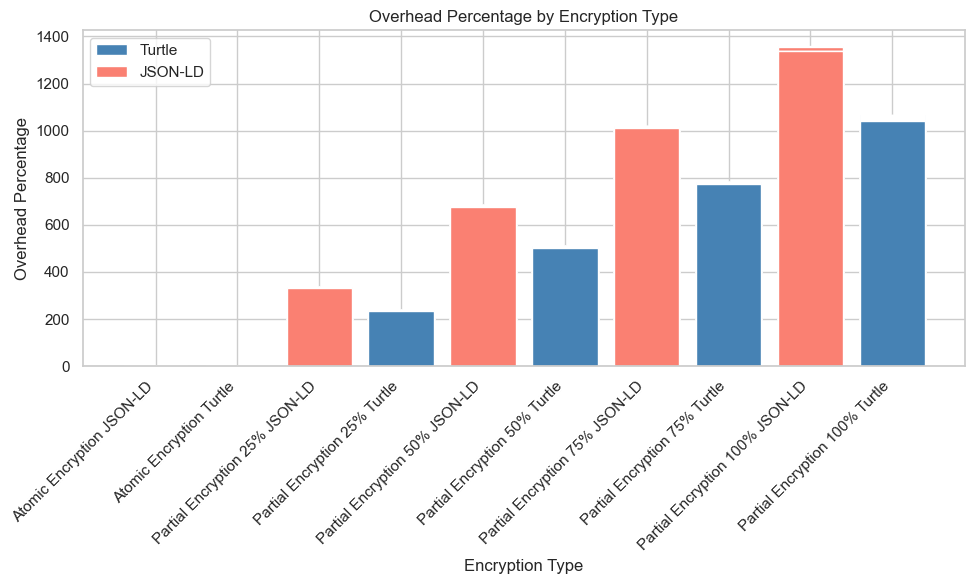

In [5]:
order = [
    "Atomic Encryption JSON-LD",
    "Atomic Encryption Turtle",
    "Partial Encryption 25% JSON-LD",
    "Partial Encryption 25% Turtle",
    "Partial Encryption 50% JSON-LD",
    "Partial Encryption 50% Turtle",
    "Partial Encryption 75% JSON-LD",
    "Partial Encryption 75% Turtle",
    "Partial Encryption 100% JSON-LD",
    "Partial Encryption 100% Turtle",
]

# Sort the DataFrame based on the custom order
df['encryptionType'] = pd.Categorical(df['encryptionType'], categories=order, ordered=True)
df = df.sort_values('encryptionType')

# Then plot as before
import matplotlib.pyplot as plt

colors = df['encryptionType'].apply(
    lambda x: 'steelblue' if 'Turtle' in x else 'salmon'
)

plt.figure(figsize=(10, 6))
plt.bar(df['encryptionType'], df['overheadPercentage'], color=colors)

plt.title('Overhead Percentage by Encryption Type')
plt.xlabel('Encryption Type')
plt.ylabel('Overhead Percentage')
plt.xticks(rotation=45, ha='right')

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='steelblue', label='Turtle'),
    Patch(facecolor='salmon', label='JSON-LD')
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.savefig("sorted_storage_overhead.png")
plt.show()

Mean of overhead percentage for Atomic encryption (Turtle format): 0.04%
Mean of overhead percentage for Atomic encryption (JSON-LD format): 0.04%


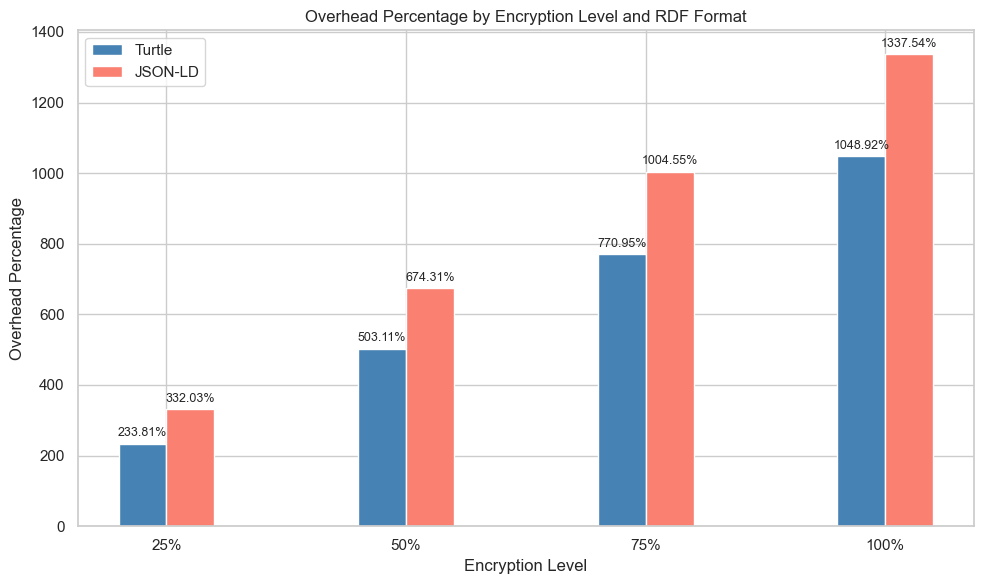

In [6]:
import numpy as np

# Create simplified labels
df['level'] = df['encryptionType'].str.extract(r'(Atomic|25%|50%|75%|100%)')
df['format'] = df['encryptionType'].apply(lambda x: 'Turtle' if 'Turtle' in x else 'JSON-LD')

atomic_df = df[df['encryptionType'].str.contains('Atomic', case=False, na=False)]

# Calculate and print the mean of 'overheadPercentage' for "Atomic" values by format
atomic_turtle_mean = atomic_df[atomic_df['format'] == 'Turtle']['overheadPercentage'].mean()
atomic_jsonld_mean = atomic_df[atomic_df['format'] == 'JSON-LD']['overheadPercentage'].mean()

print(f"Mean of overhead percentage for Atomic encryption (Turtle format): {atomic_turtle_mean:.2f}%")
print(f"Mean of overhead percentage for Atomic encryption (JSON-LD format): {atomic_jsonld_mean:.2f}%")

# Filter out rows where 'encryptionType' contains 'Atomic'
df_filtered = df[~df['encryptionType'].str.contains('Atomic', case=False, na=False)]

# Pivot to get grouped bar layout
pivot_df = df_filtered.pivot_table(
    index='level',
    columns='format',
    values='overheadPercentage',
    aggfunc='mean'  # or 'max', 'min', etc. depending on what makes sense
)

pivot_df = pivot_df.reindex(['25%', '50%', '75%', '100%'])

# Bar chart
x = np.arange(len(pivot_df.index))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, pivot_df['Turtle'], width, label='Turtle', color='steelblue')
bars2 = ax.bar(x + width/2, pivot_df['JSON-LD'], width, label='JSON-LD', color='salmon')

# Labels and styling
ax.set_title('Overhead Percentage by Encryption Level and RDF Format')
ax.set_xlabel('Encryption Level')
ax.set_ylabel('Overhead Percentage')
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index)
ax.legend()

# Optionally add value labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("clean_grouped_encryption_overhead.png")
plt.show()